import and loading dataset

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


# Load the dataset
df = pd.read_csv('HR_Analytics_Dataset.csv')

In [4]:
print("\n First 5 Rows of the Dataset:")
print(df.head())


 First 5 Rows of the Dataset:
                            Employee ID  Age  Gender Department    Job Role  \
0  2c806a81-ed2d-4aa8-94dd-2de215bfc3bf   45  Female        R&D     Analyst   
1  1c400b0d-ae7a-48e2-a6d9-654c741da8fc   46  Female      Sales  Consultant   
2  3a950f74-603b-43ce-aca0-8bc53ff375cb   59    Male    Finance    Engineer   
3  3415060e-b1fe-4b02-8fce-e81f7ac7b030   59    Male         HR  Consultant   
4  5c7114f1-9982-4e38-9375-3be60b64031b   39  Female        R&D   Executive   

  Education Level  Years at Company  Years in Current Role  Monthly Income  \
0       Bachelors                10                      4          125789   
1       Bachelors                20                     11           68375   
2             PhD                14                     10          127309   
3             PhD                25                      2          142469   
4       Bachelors                11                      5          114075   

   Job Satisfaction  Work

In [5]:
print("\n Data Summary:")
print(df.info())


 Data Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Employee ID            1000 non-null   object
 1   Age                    1000 non-null   int64 
 2   Gender                 1000 non-null   object
 3   Department             1000 non-null   object
 4   Job Role               1000 non-null   object
 5   Education Level        1000 non-null   object
 6   Years at Company       1000 non-null   int64 
 7   Years in Current Role  1000 non-null   int64 
 8   Monthly Income         1000 non-null   int64 
 9   Job Satisfaction       1000 non-null   int64 
 10  Work-Life Balance      1000 non-null   int64 
 11  Attrition              1000 non-null   object
dtypes: int64(6), object(6)
memory usage: 93.9+ KB
None


In [6]:
print("\n Statistical Overview:")
print(df.describe())


 Statistical Overview:
               Age  Years at Company  Years in Current Role  Monthly Income  \
count  1000.000000       1000.000000            1000.000000     1000.000000   
mean     41.045000         15.461000               8.306000    89919.953000   
std      11.606191          8.448542               6.787226    35208.937016   
min      22.000000          1.000000               1.000000    30500.000000   
25%      31.000000          8.000000               3.000000    59969.500000   
50%      41.000000         15.000000               6.000000    89928.500000   
75%      52.000000         23.000000              13.000000   120416.250000   
max      60.000000         30.000000              30.000000   149995.000000   

       Job Satisfaction  Work-Life Balance  
count        1000.00000        1000.000000  
mean            2.93400           3.033000  
std             1.43865           1.421947  
min             1.00000           1.000000  
25%             2.00000           2.000

In [7]:
print("\n Checking for Missing Values:")
print(df.isnull().sum())


 Checking for Missing Values:
Employee ID              0
Age                      0
Gender                   0
Department               0
Job Role                 0
Education Level          0
Years at Company         0
Years in Current Role    0
Monthly Income           0
Job Satisfaction         0
Work-Life Balance        0
Attrition                0
dtype: int64


In [8]:
print("\n Unique Values per Column:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")


 Unique Values per Column:
Employee ID: 1000 unique values
Age: 39 unique values
Gender: 2 unique values
Department: 6 unique values
Job Role: 6 unique values
Education Level: 3 unique values
Years at Company: 30 unique values
Years in Current Role: 30 unique values
Monthly Income: 995 unique values
Job Satisfaction: 5 unique values
Work-Life Balance: 5 unique values
Attrition: 2 unique values


In [9]:
print("\n Attrition Distribution:")
print(df['Attrition'].value_counts(normalize=True))



 Attrition Distribution:
Attrition
No     0.536
Yes    0.464
Name: proportion, dtype: float64


In [10]:
df.drop('Employee ID', axis=1, inplace=True)


In [11]:
label_cols = ['Gender', 'Department', 'Job Role', 'Education Level', 'Attrition']
label_encoders = {}
for col in label_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [12]:
scaler = StandardScaler()
numerical_cols = ['Age', 'Years at Company', 'Years in Current Role', 'Monthly Income', 'Job Satisfaction', 'Work-Life Balance']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


In [13]:
print(df.head())

        Age  Gender  Department  Job Role  Education Level  Years at Company  \
0  0.340937       0           4         0                0         -0.646707   
1  0.427141       0           5         1                0          0.537521   
2  1.547793       1           0         2                2         -0.173016   
3  1.547793       1           1         1                2          1.129636   
4 -0.176287       0           4         3                0         -0.528284   

   Years in Current Role  Monthly Income  Job Satisfaction  Work-Life Balance  \
0              -0.634745        1.019258         -0.649545           0.680394   
1               0.397121       -0.612223          1.436787          -0.023219   
2               0.249711        1.062451         -1.344989           0.680394   
3              -0.929563        1.493239         -0.649545           1.384007   
4              -0.487335        0.686392         -1.344989          -0.023219   

   Attrition  
0          0  
1 

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

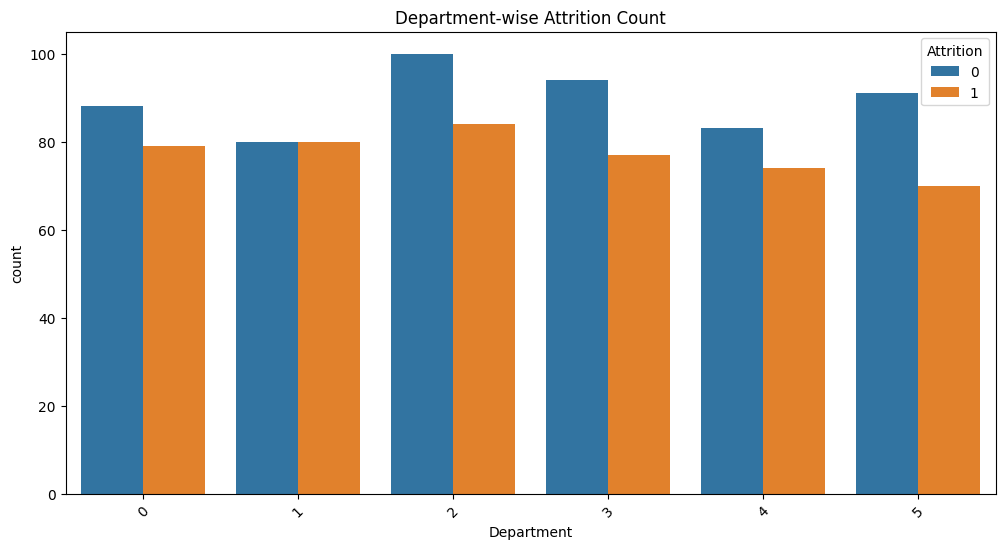

In [15]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='Department', hue='Attrition')
plt.title('Department-wise Attrition Count')
plt.xticks(rotation=45)
plt.show()

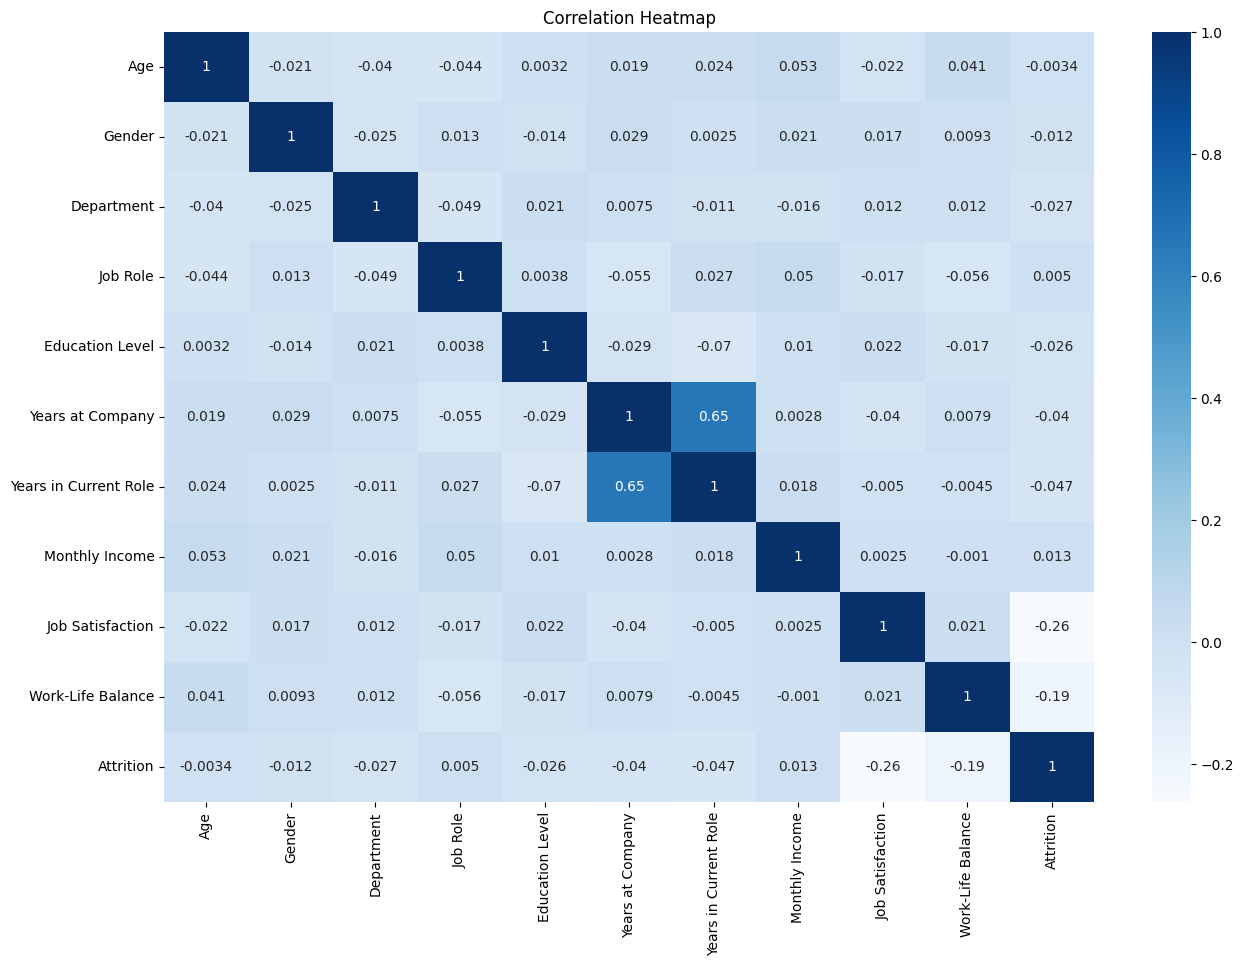

In [16]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()

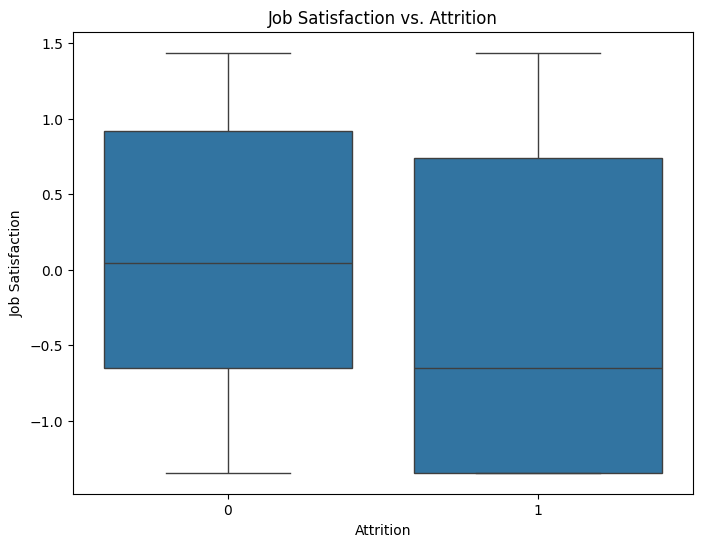

In [17]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='Attrition', y='Job Satisfaction')
plt.title('Job Satisfaction vs. Attrition')
plt.show()

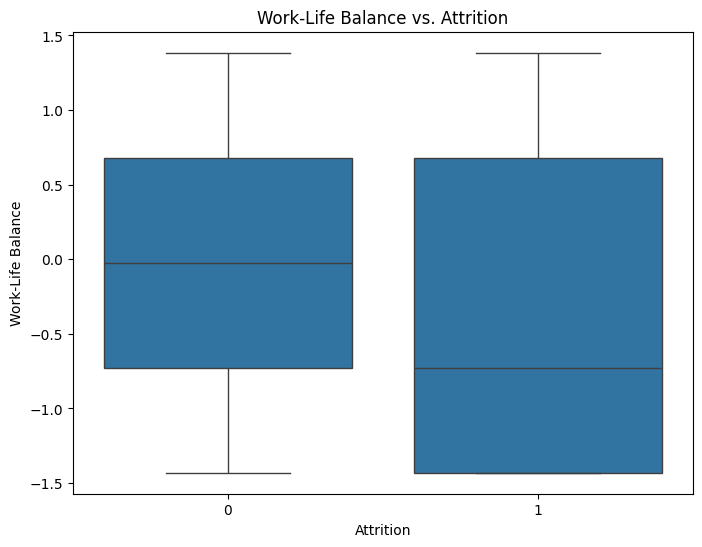

In [19]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='Attrition', y='Work-Life Balance')
plt.title('Work-Life Balance vs. Attrition')
plt.show()

In [20]:
print("\n EDA complete. Key insights generated.")



 EDA complete. Key insights generated.


In [21]:
X = df.drop('Attrition', axis=1)
y = df['Attrition']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [23]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)


In [24]:
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

In [25]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)


In [26]:
print("\n Model training complete.")


 Model training complete.


In [27]:
print("\n Logistic Regression Report:")
print(classification_report(y_test, y_pred_lr))



 Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.65      0.71      0.68       108
           1       0.62      0.55      0.59        92

    accuracy                           0.64       200
   macro avg       0.64      0.63      0.63       200
weighted avg       0.64      0.64      0.64       200



In [28]:
print("\n Decision Tree Report:")
print(classification_report(y_test, y_pred_dt))


 Decision Tree Report:
              precision    recall  f1-score   support

           0       0.69      0.62      0.65       108
           1       0.60      0.67      0.64        92

    accuracy                           0.65       200
   macro avg       0.65      0.65      0.64       200
weighted avg       0.65      0.65      0.65       200



In [29]:
print("\n Random Forest Report:")
print(classification_report(y_test, y_pred_rf))


 Random Forest Report:
              precision    recall  f1-score   support

           0       0.71      0.66      0.68       108
           1       0.63      0.68      0.66        92

    accuracy                           0.67       200
   macro avg       0.67      0.67      0.67       200
weighted avg       0.67      0.67      0.67       200



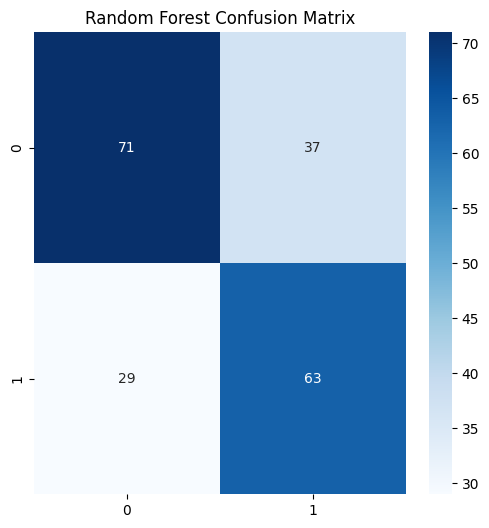

In [30]:
plt.figure(figsize=(6,6))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Blues")
plt.title("Random Forest Confusion Matrix")
plt.show()

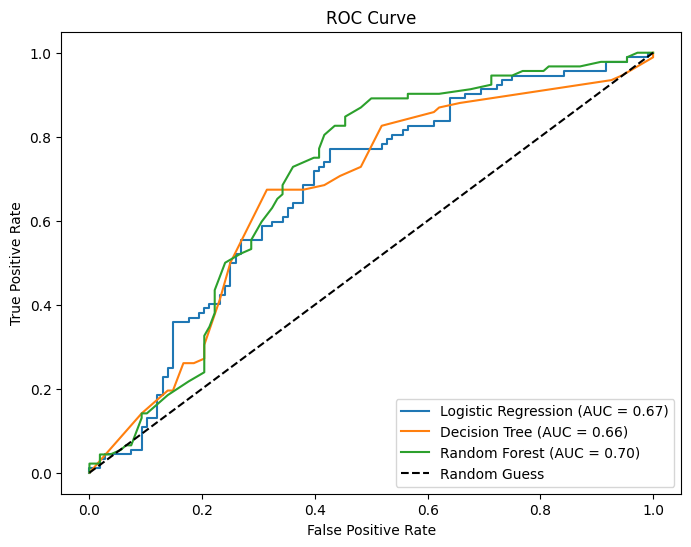


 Model evaluation complete with Confusion Matrix and ROC Curve.


In [31]:
plt.figure(figsize=(8,6))
for model, name in zip([lr_model, dt_model, rf_model], ["Logistic Regression", "Decision Tree", "Random Forest"]):
    y_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc_score(y_test, y_proba):.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

print("\n Model evaluation complete with Confusion Matrix and ROC Curve.")

In [2]:
import pandas as pd



# Save the cleaned dataset
cleaned_file_path = 'Cleaned_HR_Analytics_Dataset.csv'
df.to_csv(cleaned_file_path, index=False)

print(f"Cleaned dataset saved as '{cleaned_file_path}'")


NameError: name 'df' is not defined

In [1]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np
import shap
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier


In [6]:
# Load the HR Analytics dataset
file_path = 'HR_Analytics_Dataset.csv'
data = pd.read_csv('HR_Analytics_Dataset.csv')

# Display the first few rows to verify the data
print(data.head())


                            Employee ID  Age  Gender Department    Job Role  \
0  2c806a81-ed2d-4aa8-94dd-2de215bfc3bf   45  Female        R&D     Analyst   
1  1c400b0d-ae7a-48e2-a6d9-654c741da8fc   46  Female      Sales  Consultant   
2  3a950f74-603b-43ce-aca0-8bc53ff375cb   59    Male    Finance    Engineer   
3  3415060e-b1fe-4b02-8fce-e81f7ac7b030   59    Male         HR  Consultant   
4  5c7114f1-9982-4e38-9375-3be60b64031b   39  Female        R&D   Executive   

  Education Level  Years at Company  Years in Current Role  Monthly Income  \
0       Bachelors                10                      4          125789   
1       Bachelors                20                     11           68375   
2             PhD                14                     10          127309   
3             PhD                25                      2          142469   
4       Bachelors                11                      5          114075   

   Job Satisfaction  Work-Life Balance Attrition  
0    

In [7]:
# Drop the Employee ID column
data.drop(['Employee ID'], axis=1, inplace=True)


In [8]:
# Encode categorical variables
label_encoders = {}
for col in ['Gender', 'Department', 'Job Role', 'Education Level', 'Attrition']:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le


In [9]:
# Define features (X) and target (y)
X = data.drop('Attrition', axis=1)
y = data['Attrition']


In [10]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
# Train the Decision Tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [17]:
# Check the shape of X_test
print("Shape of X_test:", X_test.shape)

# Check the shape of the SHAP values
print("Length of shap_values:", len(shap_values))
print("Shape of shap_values[0]:", shap_values[0].shape)
print("Shape of shap_values[1]:", shap_values[1].shape if len(shap_values) > 1 else "Not available")


Shape of X_test: (200, 10)
Length of shap_values: 200
Shape of shap_values[0]: (10, 2)
Shape of shap_values[1]: (10, 2)


In [18]:
# Initialize SHAP explainer (use model and full training data to avoid shape mismatch)
explainer = shap.TreeExplainer(model, X_train)
shap_values = explainer.shap_values(X_test)

# Confirm the correct shape
print("Length of shap_values:", len(shap_values))
print("Shape of shap_values[0]:", shap_values[0].shape)


Length of shap_values: 200
Shape of shap_values[0]: (10, 2)


In [21]:
# Initialize SHAP explainer for tree-based models
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

# Confirm the correct shape
print("Shape of shap_values:", shap_values.shape)


Shape of shap_values: (200, 10, 2)


<Figure size 1200x800 with 0 Axes>

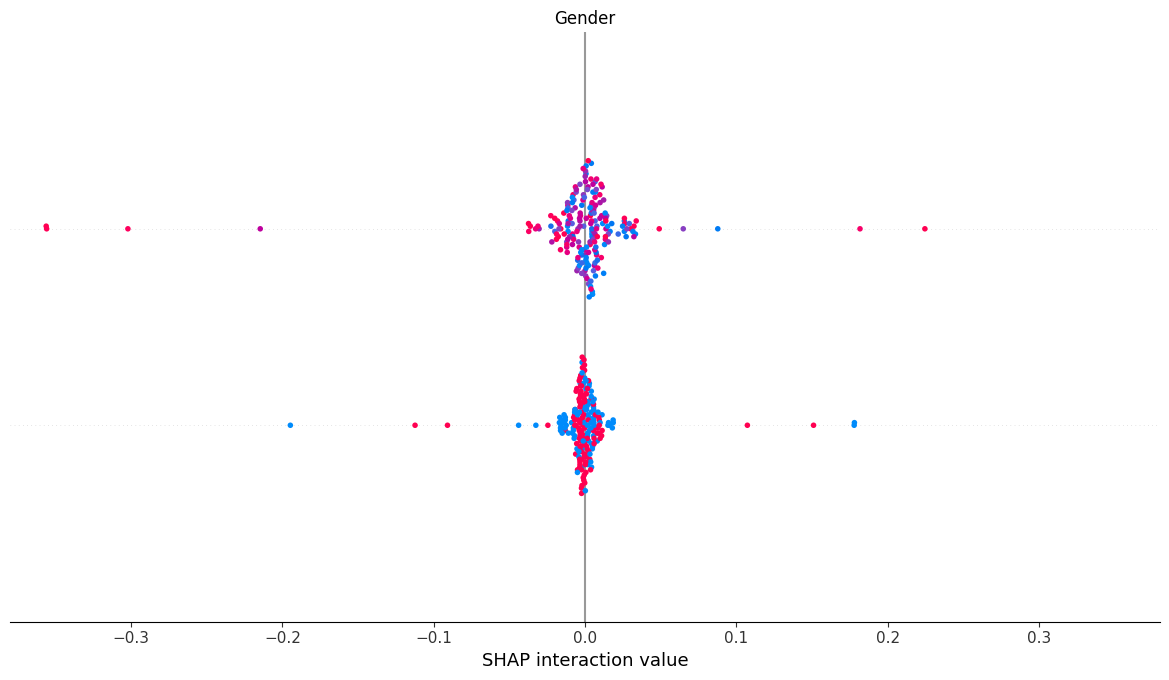

In [22]:
# Plot SHAP summary (bar plot)
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values, X_test, plot_type="bar")
plt.show()
